In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib

importlib.reload(functions_nHits)

<module 'functions_nHits' from '/home/cgarcia_2002/nHits_count/functions_nHits.py'>

In [3]:
Partition = "P0"

df = pd.read_hdf(f"/home/cgarcia_2002/nHits_count/dataFrames_nHits/nHits_DataFrame_{Partition}.h5", key="df")


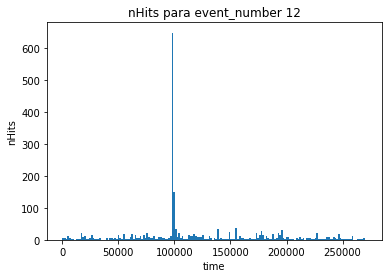

In [4]:
# Seleccionar la fila con event_number n
# Como event_number es la primera columna, podemos usar .loc o .query:
n_event = 12
fila_n= df.loc[df["event_number"] == n_event] #podria hacerse sin el loc

# fila_1105 es un DataFrame con una fila, extraemos solo las columnas con los datos
# excluimos la columna 'event_number'
datos = fila_n.drop(columns=["event_number"]).values.flatten()

# Paso 3: Graficar usando times_array (los nombres de columna)
times_array = df.columns[1:].astype(int)  # las columnas excepto 'event_number'

plt.figure()
plt.bar(times_array, datos, width = 1500, align='edge')
plt.xlabel("time")
plt.ylabel("nHits")
plt.title(f"nHits para event_number {n_event}")
#plt.savefig('nHits_inf0.png', facecolor='white')
plt.show()

1129.0


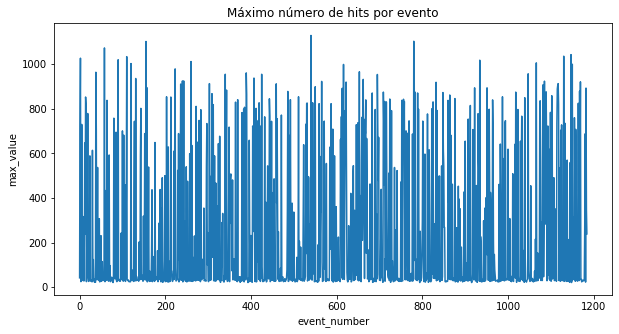

In [11]:
# Calculamos el máximo de cada fila, ignorando la columna 'event_number'
df['max_value'] = df.drop(columns=['event_number']).max(axis=1)
print(np.max(df["max_value"]))

plt.figure(figsize=(10, 5))
plt.plot(df["event_number"], df["max_value"], linestyle='-')
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
#plt.savefig('max_hits_por_evento.png', facecolor='white')
plt.show()


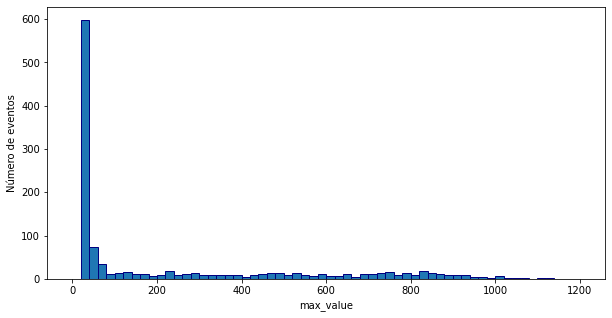

In [13]:
bin_hist = 20
hist_max = functions_nHits.count_nHits(df['max_value'], bin_hist, np.zeros(int(1200/ bin_hist)))
max_array = np.arange(0, 1200, bin_hist)
plt.figure(figsize=(10, 5))
plt.bar(max_array, hist_max, width=bin_hist, align='edge', edgecolor='navy')
plt.xlabel("max_value")
plt.ylabel("Número de eventos")
plt.savefig('hist_max_value.pdf')
plt.show()

1185
Máximo entre 0–299:     0.7063291139240506 eventos
Máximo entre 300–700:  0.15443037974683543 eventos
Máximo > 701:          0.13924050632911392 eventos
[   1    2    5   14   15   19   38   39   58   64   80   90  100  110
  120  128  131  143  155  157  203  213  223  236  239  240  243  260
  272  279  283  297  303  309  312  340  343  349  364  369  379  383
  385  386  389  390  404  407  412  417  419  423  425  432  443  444
  448  459  461  471  486  492  511  528  530  531  540  544  550  559
  565  571  587  591  611  613  616  620  622  646  650  653  659  662
  666  668  683  690  695  696  709  710  712  716  724  728  752  756
  758  762  769  780  781  783  789  791  801  812  822  825  832  834
  848  860  864  876  907  912  918  922  930  934  951  955  956  964
  965  987  993  994 1018 1019 1021 1023 1032 1039 1047 1066 1074 1075
 1081 1082 1085 1089 1093 1099 1102 1103 1114 1115 1116 1117 1118 1123
 1125 1130 1133 1147 1150 1155 1158 1164 1167 1169 1182]


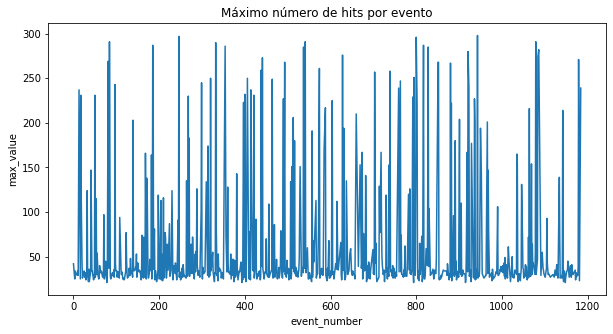

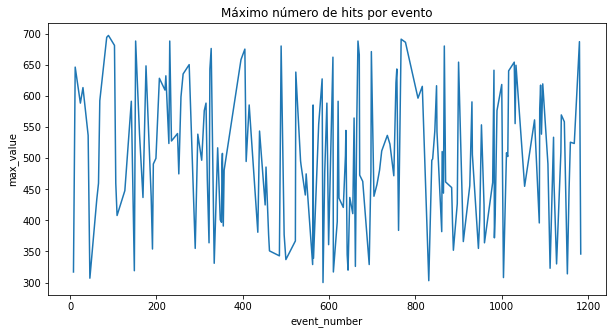

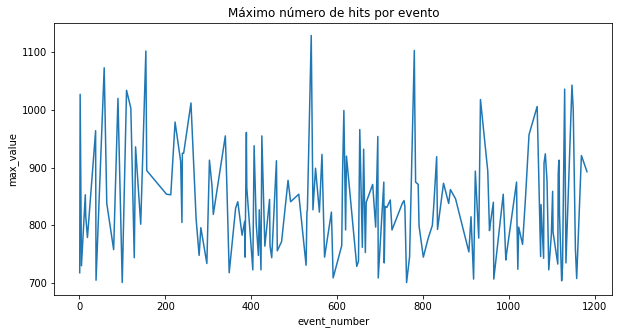

In [ ]:
# Condiciones por rangos

print(df.shape[0])
count_0_300 = df[(df["max_value"] < 300)].shape[0]
count_300_700 = df[(df["max_value"] >= 300) & (df["max_value"] <= 700)].shape[0]
count_700_up = df[df["max_value"] > 700].shape[0]

# Mostrar resultados
print(f"Máximo entre 0–299:     {count_0_300 / df.shape[0]} eventos")
print(f"Máximo entre 300–700:  {count_300_700 / df.shape[0]} eventos")
print(f"Máximo > 701:          {count_700_up / df.shape[0]} eventos")

eventos_700_up = df[df["max_value"] > 700]["event_number"].values
print(eventos_700_up)

plt.figure(figsize=(10, 5))
plt.plot(df[(df["max_value"] < 300)]["event_number"], df[(df["max_value"] < 300)]["max_value"])
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df[(df["max_value"] >= 300) & (df["max_value"] <= 700)]["event_number"], df[(df["max_value"] >= 300) & (df["max_value"] <= 700)]["max_value"])
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df[df["max_value"] > 700]["event_number"], df[df["max_value"] > 700]["max_value"])
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()


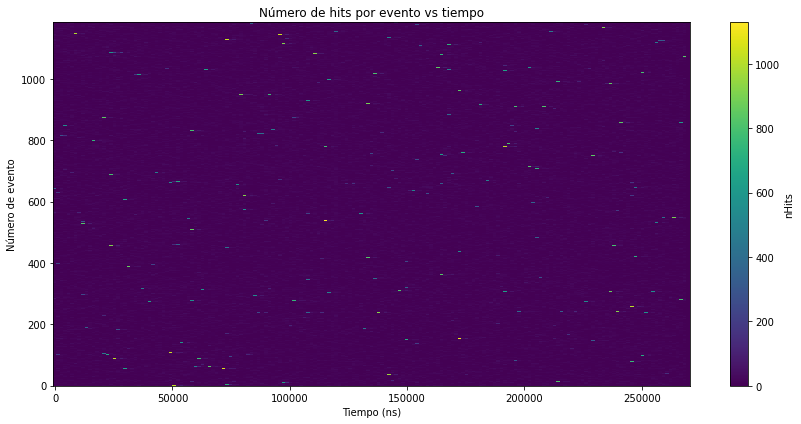

In [71]:
# Extraemos solo las columnas de tiempos (como strings inicialmente)
data = df.drop(columns=["event_number", "max_value"])

# Convertimos los nombres de las columnas a enteros (eje X)
x = data.columns.astype(int).to_numpy()

# El eje Y son simplemente índices: un valor por fila (número de eventos)
y = df["event_number"].to_numpy()

# Los valores de Z son el contenido del DataFrame (nHits)
z = data.to_numpy()

plt.figure(figsize=(12, 6))

# Creamos la malla de coordenadas X, Y para pcolormesh
X, Y = np.meshgrid(x, y)

# Dibujamos el mapa de color
pcm = plt.pcolormesh(X, Y, z, shading='auto', cmap='viridis')

# Etiquetas y colorbar
plt.xlabel("Tiempo (ns)")
plt.ylabel("Número de evento")
plt.title("Número de hits por evento vs tiempo")
cbar = plt.colorbar(pcm)
cbar.set_label("nHits")

plt.tight_layout()
plt.show()


In [72]:
#llamamos df prompt a los eventos que tienen picos entre 300 y 700 hits
df_prompt = df[(df["max_value"] >= 300) & (df["max_value"] <= 700)].copy()

#idxmax es el tiempo en el que el pico maximo se ha dado
df_prompt["idxmax"] = df_prompt.drop(columns=['event_number', 'max_value']).idxmax(axis=1).astype(int)

#filtro para que el pico sea limpio - no hay picos en 15000ns cercanos
df_prompt = functions_nHits.filter_neighbor(df_prompt, 1)

num_filas = df_prompt.shape[0]
print("Número de filas-posibles eventos - pico entre 300 y 700 nHits y sin otros picos en 4500 ns al rededor:", num_filas)

[INFO] Número de eventos antes del filtro: 183
Evento 644, accediendo valores evento 643
Evento 717 descartado por vecinos con valor > 300.
Evento 824 descartado por vecinos con valor > 300.
Evento 1127 descartado por vecinos con valor > 300.
[INFO] Número de eventos después del filtro: 180
Número de filas-posibles eventos - pico entre 300 y 700 nHits y sin otros picos en 4500 ns al rededor: 180


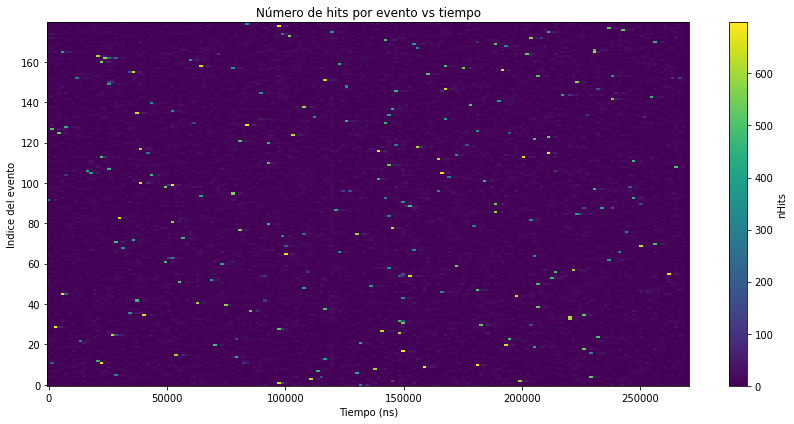

In [78]:
# Extraemos solo las columnas de tiempos (como strings inicialmente)
data = df_prompt.drop(columns=["event_number", "max_value", "idxmax"])

# Convertimos los nombres de las columnas a enteros (eje X)
x = data.columns.astype(int).to_numpy()

# El eje Y son simplemente índices: un valor por fila (número de eventos)
y = df_prompt.index.to_numpy() #df_prompt["event_number"].to_numpy()

# Los valores de Z son el contenido del DataFrame (nHits)
z = data.to_numpy()

plt.figure(figsize=(12, 6))

# Creamos la malla de coordenadas X, Y para pcolormesh
X, Y = np.meshgrid(x, y)

# Dibujamos el mapa de color
pcm = plt.pcolormesh(X, Y, z, shading='auto', cmap='viridis')

# Etiquetas y colorbar
plt.xlabel("Tiempo (ns)")
plt.ylabel("Indice del evento")
plt.title("Número de hits por evento vs tiempo")
cbar = plt.colorbar(pcm)
cbar.set_label("nHits")

plt.tight_layout()
plt.show()

In [ ]:
df_prompt.to_hdf(f"/home/cgarcia_2002/nHits_count/dataFrames_nHits/Filtered_df/nHits_DataFrame_{Partition}_Prompt.h5", key="df", mode="w")

In [73]:
print(df_prompt)

     event_number     0  1500  3000  4500  6000  7500  9000  10500  12000  \
0               8  17.0   8.0   6.0   2.0  10.0  18.0   4.0    3.0    2.0   
1              12   5.0   6.0   2.0  13.0   5.0   1.0   2.0    0.0    4.0   
2              24   2.0   3.0   4.0   3.0  10.0   3.0  10.0   16.0    2.0   
3              30  10.0   1.0   3.0   9.0   3.0   2.0   2.0    0.0    5.0   
4              42  21.0  13.0  14.0   9.0   7.0   6.0   5.0   14.0   17.0   
..            ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
175          1156  13.0  12.0   5.0   3.0   1.0  12.0   6.0    9.0    9.0   
176          1159   1.0   2.0   3.0   2.0   4.0   1.0   0.0    1.0   10.0   
177          1168   5.0   7.0   8.0   9.0   1.0   4.0   9.0    5.0    5.0   
178          1180   4.0   2.0   5.0   2.0  10.0   3.0   6.0    2.0    3.0   
179          1183   0.0   0.0   8.0   2.0  14.0  19.0   3.0    4.0    7.0   

     ...  259500  261000  262500  264000  265500  267000  268500  270000  \